# گندله سازی اردکان
بررسی ارتباط پارامترهای ورودی به میکسرهای 
و گندله خروجی

ابتدا توابع مورد نیاز را ایمپورت می کنیم

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import scale , normalize, minmax_scale
from sklearn.neural_network import MLPRegressor


داده های ورودی را که شامل پارامترهای کنسانتره ورودی به میکسر است را وارد می کنیم

In [2]:
i_df=pd.read_csv('input-data.csv')

In [3]:
i_df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%
0,1823.333333,67.460000,22.820000,3.029500,0.638000,0.426000,0.497000,0.091000,0.0310,0.222000
1,1837.333333,67.536667,22.656667,2.968333,0.673600,0.442567,0.492200,0.100900,0.0285,0.223267
2,1712.333333,67.650000,22.663333,2.838333,0.604900,0.392067,0.449533,0.088167,0.0272,0.270367
3,1794.333333,67.653333,22.506667,2.899667,0.622367,0.430867,0.485933,0.094567,0.0293,0.245033
4,1807.666667,67.490000,23.446667,3.013000,0.642667,0.401000,0.443333,0.094333,0.0310,0.213000
...,...,...,...,...,...,...,...,...,...,...
165,1737.333333,67.553333,23.476667,2.949000,0.659333,0.393667,0.559000,0.108000,0.0250,0.239333
166,1715.000000,67.486667,23.556667,3.085333,0.655667,0.448333,0.607000,0.104667,0.0270,0.214667
167,1707.000000,67.666667,22.693333,3.148000,0.632000,0.387000,0.604000,0.102000,0.0270,0.243000
168,1730.000000,67.930000,22.986667,2.900500,0.590500,0.381000,0.531500,0.096500,0.0255,0.242500


داده های گندله خروجی را وارد می کنیم

In [4]:
o_df=pd.read_csv('output-data.csv')

In [5]:
o_df

,PL-CCS kg/pl,PL-Tfe%,PL-FeO%,>16 mm,9-16 mm,6.3-9mm,<6.3 mm,Tumble%,Abrasion%,Porosity%,PL-SiO2%,PL-AL2O3%,PL-P%,PL-MnO%,PL-TiO2%,PL-CaO%,PL-MgO%
0,287,65.46,0.47,8.05,83.25,7.50,1.20,97.28,1.75,20.94,3.55,0.63,0.09,0.03,0.21,0.64,0.42
1,258,65.49,0.53,7.41,88.18,4.00,0.41,96.80,2.39,22.51,3.52,0.65,0.10,0.03,0.22,0.66,0.43
2,298,65.62,0.63,8.47,86.61,4.43,0.49,97.55,2.01,20.90,3.59,0.62,0.09,0.03,0.27,0.62,0.41
3,312,65.66,0.99,5.75,88.81,5.00,0.44,97.75,1.69,19.15,3.68,0.65,0.09,0.03,0.22,0.63,0.42
4,314,65.56,0.89,7.68,88.31,3.47,0.54,97.40,2.00,19.43,3.66,0.61,0.09,0.03,0.21,0.66,0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,311,65.73,0.64,8.97,86.64,3.68,0.70,96.79,2.37,21.14,3.42,0.64,0.11,0.03,0.26,0.67,0.45
166,305,65.79,0.59,7.72,87.70,4.09,0.48,97.02,2.29,20.35,3.41,0.64,0.10,0.03,0.28,0.66,0.44
167,305,65.90,0.73,6.35,89.75,3.47,0.43,97.11,2.21,20.60,3.30,0.61,0.10,0.03,0.23,0.61,0.38
168,294,65.92,0.58,5.38,90.02,3.51,1.10,97.61,1.74,21.76,3.27,0.61,0.09,0.03,0.20,0.60,0.39


یکی از ستون های گندله را به انتهای پارامترهای کنسانتره اضافه می کنیم و دیتافریم جدید می سازیم

In [6]:
df=pd.concat([i_df, o_df['PL-Tfe%']], axis=1)

In [7]:
df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%,PL-Tfe%
0,1823.333333,67.460000,22.820000,3.029500,0.638000,0.426000,0.497000,0.091000,0.0310,0.222000,65.46
1,1837.333333,67.536667,22.656667,2.968333,0.673600,0.442567,0.492200,0.100900,0.0285,0.223267,65.49
2,1712.333333,67.650000,22.663333,2.838333,0.604900,0.392067,0.449533,0.088167,0.0272,0.270367,65.62
3,1794.333333,67.653333,22.506667,2.899667,0.622367,0.430867,0.485933,0.094567,0.0293,0.245033,65.66
4,1807.666667,67.490000,23.446667,3.013000,0.642667,0.401000,0.443333,0.094333,0.0310,0.213000,65.56
...,...,...,...,...,...,...,...,...,...,...,...
165,1737.333333,67.553333,23.476667,2.949000,0.659333,0.393667,0.559000,0.108000,0.0250,0.239333,65.73
166,1715.000000,67.486667,23.556667,3.085333,0.655667,0.448333,0.607000,0.104667,0.0270,0.214667,65.79
167,1707.000000,67.666667,22.693333,3.148000,0.632000,0.387000,0.604000,0.102000,0.0270,0.243000,65.90
168,1730.000000,67.930000,22.986667,2.900500,0.590500,0.381000,0.531500,0.096500,0.0255,0.242500,65.92


# بررسی اولیه داده ها

دیتاها را نسبت به هم ترسیم می کنیم تا دیدی کلی از داده ها بدست آوریم

<Figure size 1200x800 with 0 Axes>

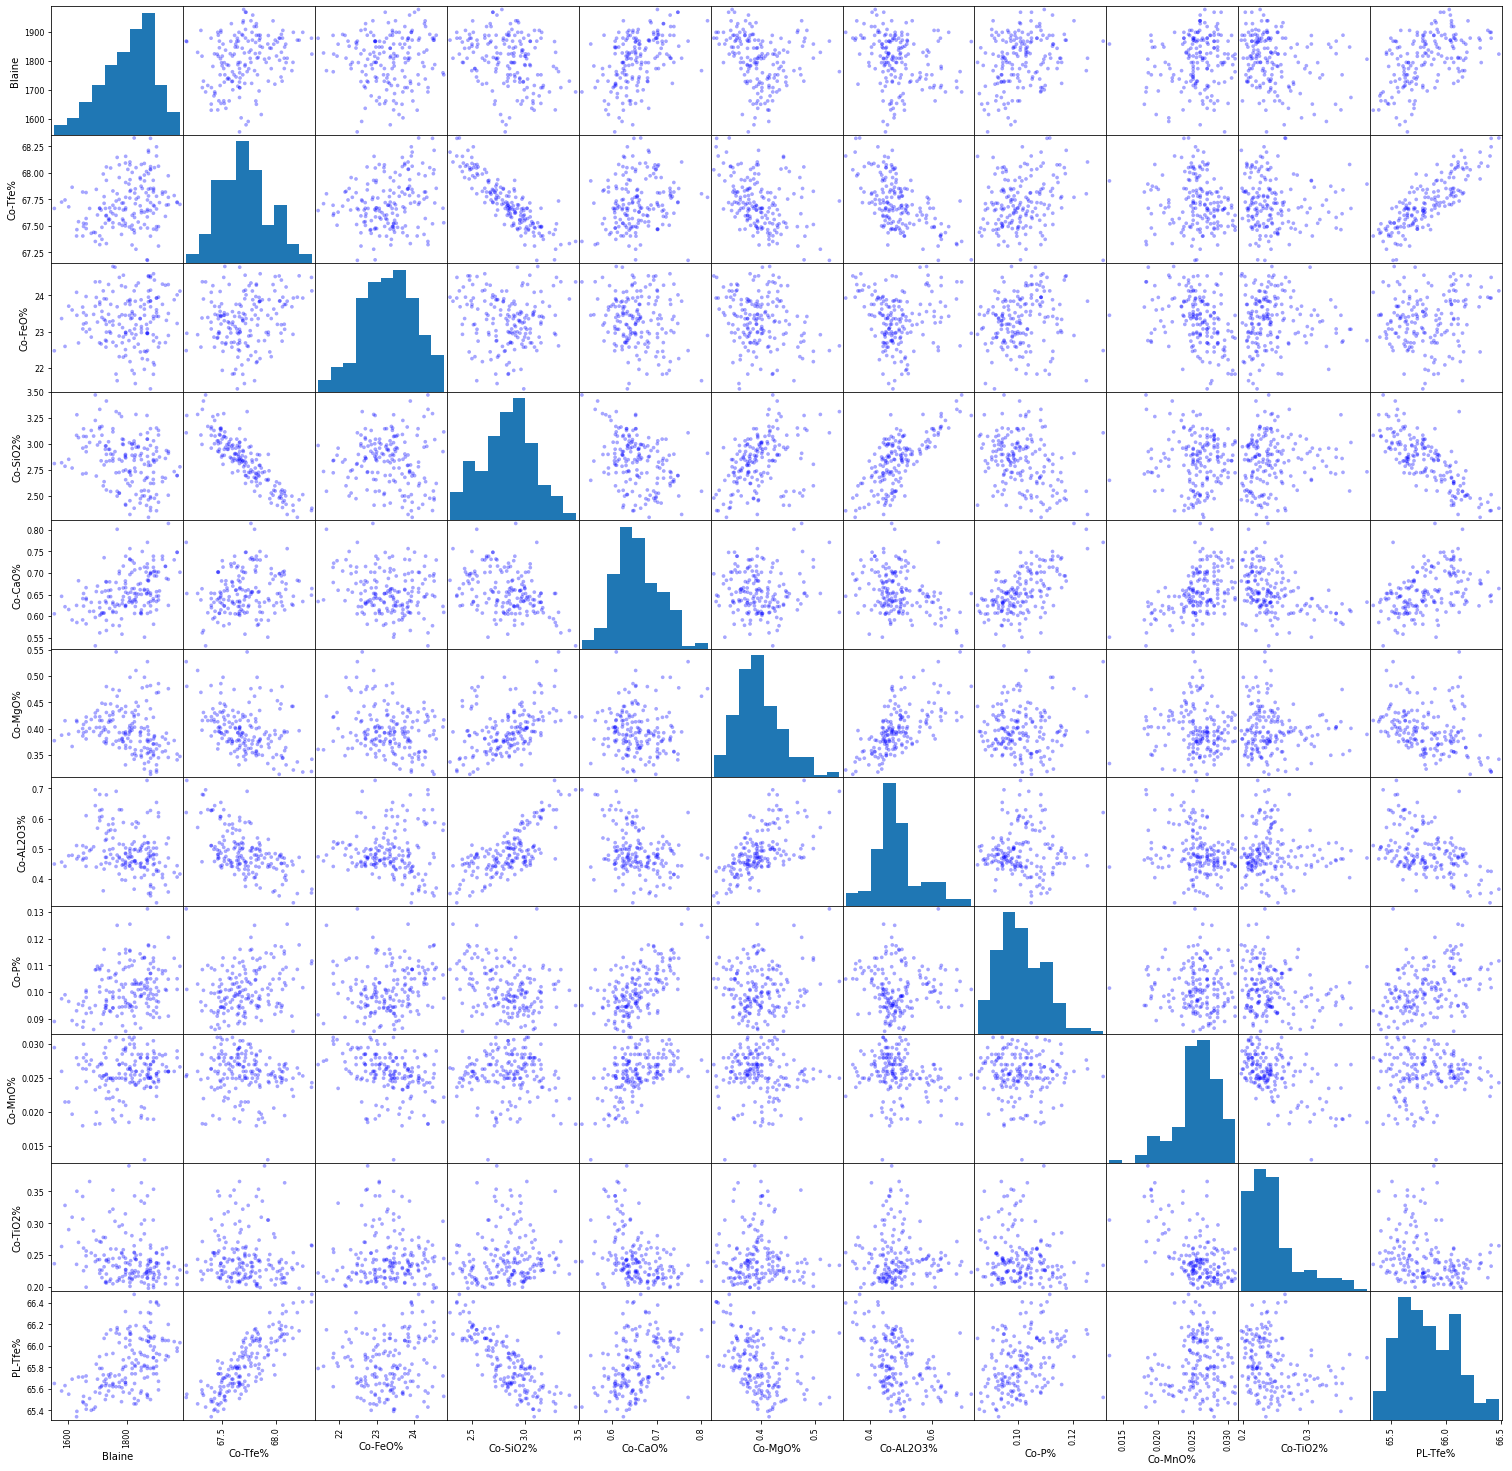

In [8]:
plt.figure(dpi=200)
pd.plotting.scatter_matrix(df, c='blue',alpha=0.35, s=55,figsize=[26,26])
plt.show()

ماتریس ضریب همبستگی دیتاها را محاسبه و ترسیم می کنیم

(11, 11)


<AxesSubplot:>

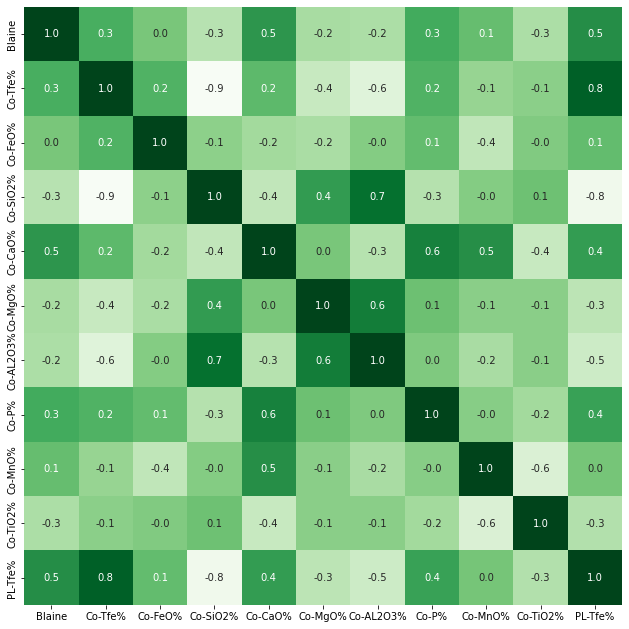

In [9]:
corr = df.corr()
print(corr.shape)
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

# پالایش داده ها

داده های پرت و نویز را شناسایی و از دیتافریم حذف می کنیم

In [10]:
col=df.columns
data=df.values
data.shape

(170, 11)

In [11]:
# identify outliers in the dataset
iso = IsolationForest()
yhat = iso.fit_predict(data)

In [12]:
print(yhat.shape)

(170,)


In [13]:
# select all rows that are not outliers
mask = yhat != -1

In [14]:
mask

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [15]:
data = data[mask, :]

In [16]:
data.shape

(153, 11)

In [17]:
not_outliers_df=pd.DataFrame(data,columns=col)

In [18]:
not_outliers_df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%,PL-Tfe%
0,1823.333333,67.460000,22.820000,3.029500,0.638000,0.426000,0.497000,0.091000,0.031000,0.222000,65.46
1,1837.333333,67.536667,22.656667,2.968333,0.673600,0.442567,0.492200,0.100900,0.028500,0.223267,65.49
2,1712.333333,67.650000,22.663333,2.838333,0.604900,0.392067,0.449533,0.088167,0.027200,0.270367,65.62
3,1794.333333,67.653333,22.506667,2.899667,0.622367,0.430867,0.485933,0.094567,0.029300,0.245033,65.66
4,1807.666667,67.490000,23.446667,3.013000,0.642667,0.401000,0.443333,0.094333,0.031000,0.213000,65.56
...,...,...,...,...,...,...,...,...,...,...,...
148,1700.000000,67.603333,23.263333,2.990667,0.669667,0.434667,0.568333,0.109667,0.026667,0.242667,65.69
149,1737.333333,67.553333,23.476667,2.949000,0.659333,0.393667,0.559000,0.108000,0.025000,0.239333,65.73
150,1715.000000,67.486667,23.556667,3.085333,0.655667,0.448333,0.607000,0.104667,0.027000,0.214667,65.79
151,1707.000000,67.666667,22.693333,3.148000,0.632000,0.387000,0.604000,0.102000,0.027000,0.243000,65.90


<Figure size 1200x800 with 0 Axes>

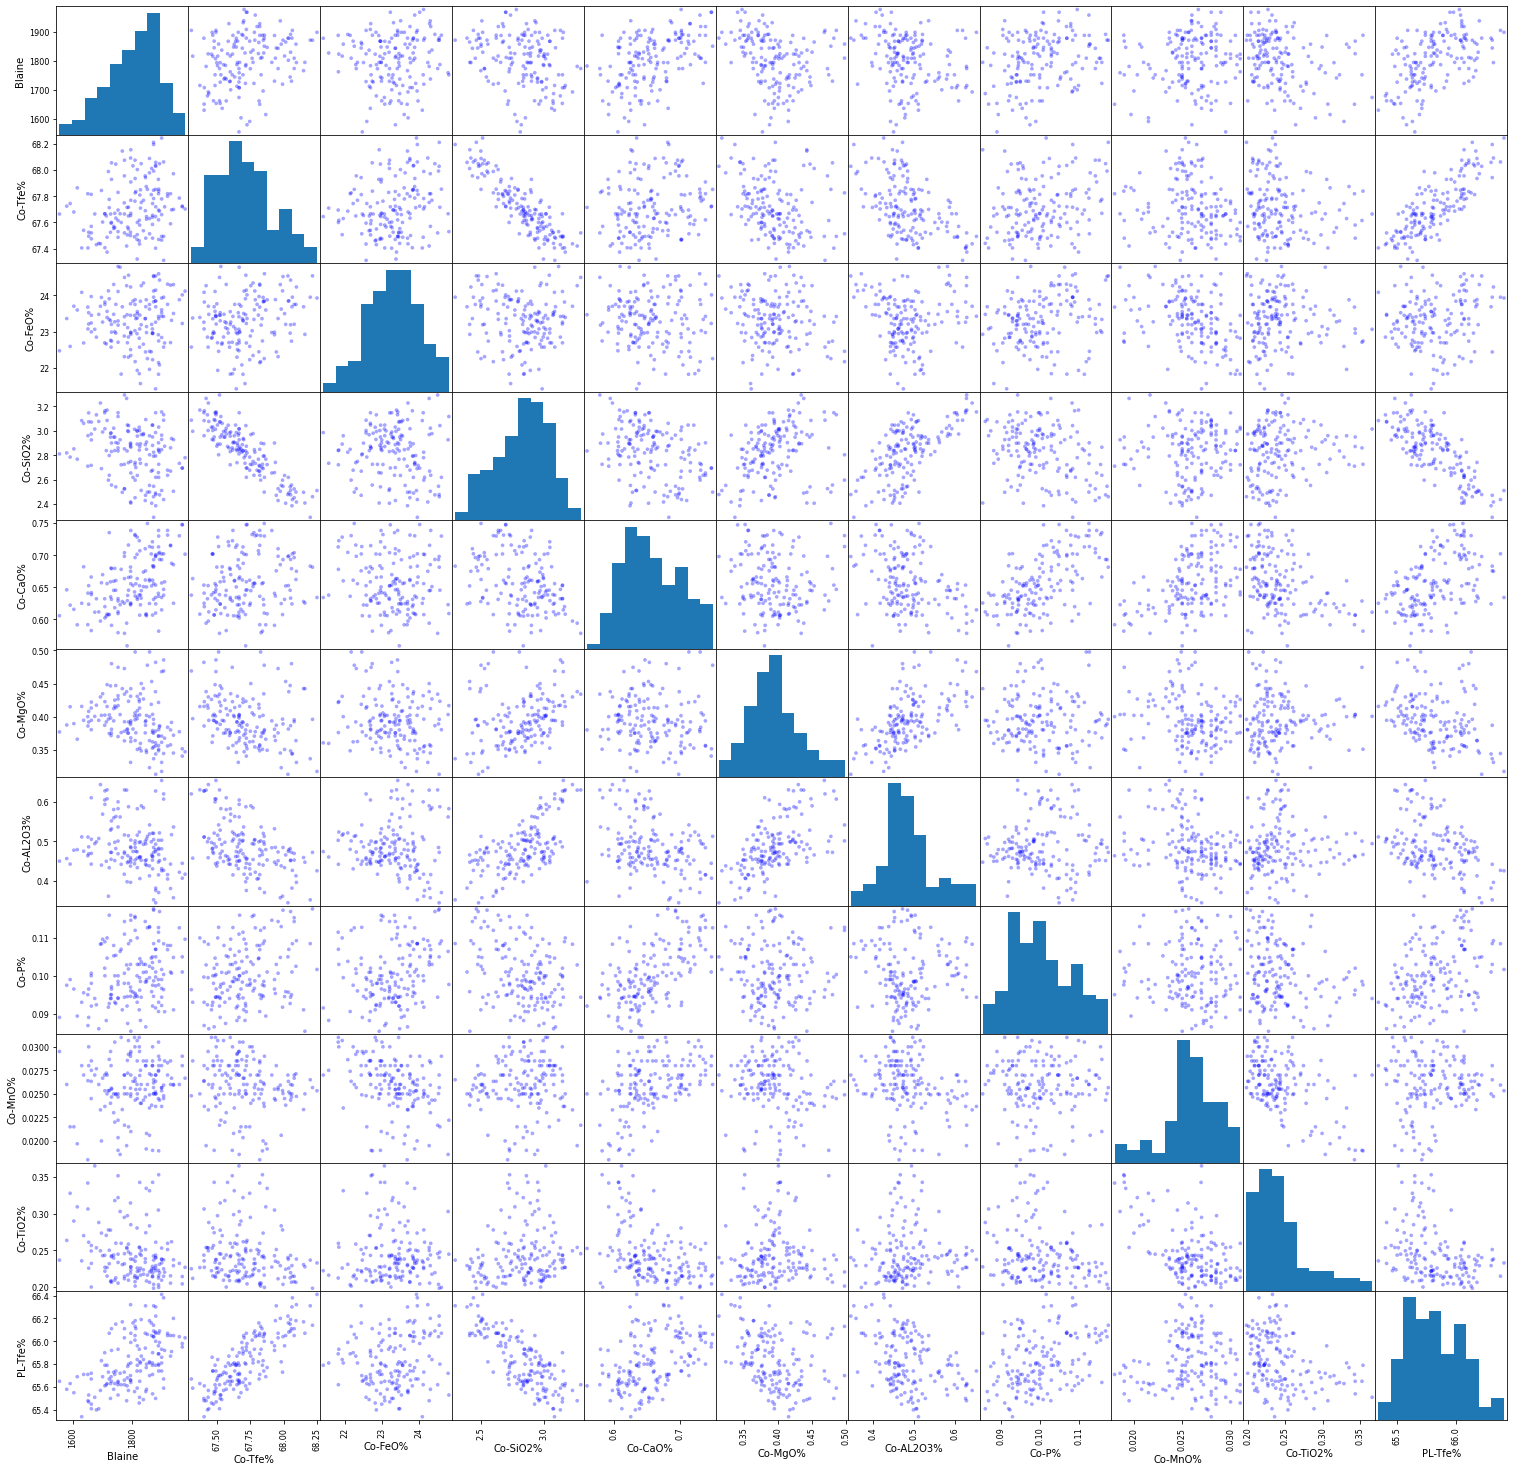

In [19]:
plt.figure(dpi=200)
pd.plotting.scatter_matrix(not_outliers_df, c='blue',alpha=0.35, s=55,figsize=[26,26])
plt.show()

(11, 11)


<AxesSubplot:>

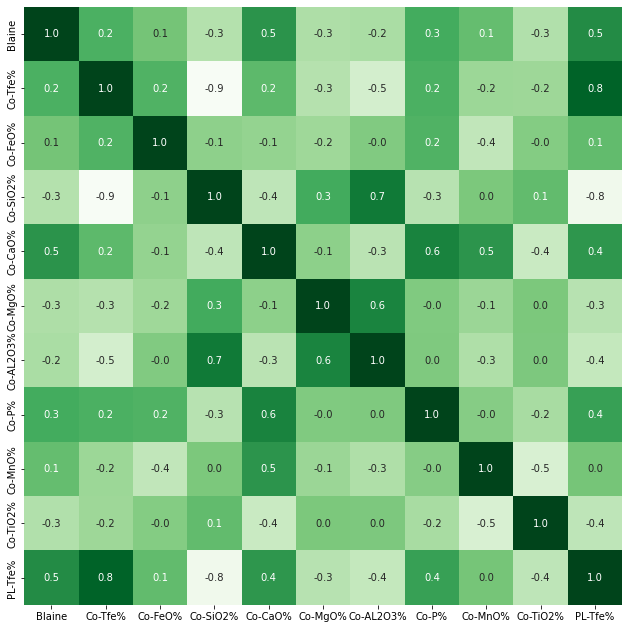

In [20]:
corr = not_outliers_df.corr()
print(corr.shape)
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

# نرمالسازی داده ها

In [21]:
data=normalize(data,norm='l2',axis=0)

In [22]:
normal_df=pd.DataFrame(data,columns=col)

In [23]:
normal_df

,Blaine,Co-Tfe%,Co-FeO%,Co-SiO2%,Co-CaO%,Co-MgO%,Co-AL2O3%,Co-P%,Co-MnO%,Co-TiO2%,PL-Tfe%
0,0.081692,0.080538,0.079118,0.086405,0.078370,0.086819,0.081991,0.073019,0.096305,0.072522,0.080400
1,0.082319,0.080629,0.078552,0.084660,0.082743,0.090195,0.081199,0.080963,0.088538,0.072936,0.080436
2,0.076719,0.080765,0.078575,0.080953,0.074305,0.079903,0.074160,0.070746,0.084500,0.088322,0.080596
3,0.080393,0.080769,0.078032,0.082702,0.076450,0.087811,0.080165,0.075881,0.091024,0.080046,0.080645
4,0.080990,0.080574,0.081291,0.085934,0.078944,0.081724,0.073137,0.075694,0.096305,0.069582,0.080522
...,...,...,...,...,...,...,...,...,...,...,...
148,0.076166,0.080709,0.080655,0.085297,0.082260,0.088585,0.093759,0.087998,0.082843,0.079273,0.080682
149,0.077839,0.080649,0.081395,0.084109,0.080991,0.080230,0.092219,0.086660,0.077665,0.078184,0.080731
150,0.076838,0.080570,0.081672,0.087997,0.080541,0.091371,0.100138,0.083985,0.083878,0.070126,0.080805
151,0.076480,0.080785,0.078679,0.089785,0.077633,0.078871,0.099643,0.081846,0.083878,0.079382,0.080940


<Figure size 1200x800 with 0 Axes>

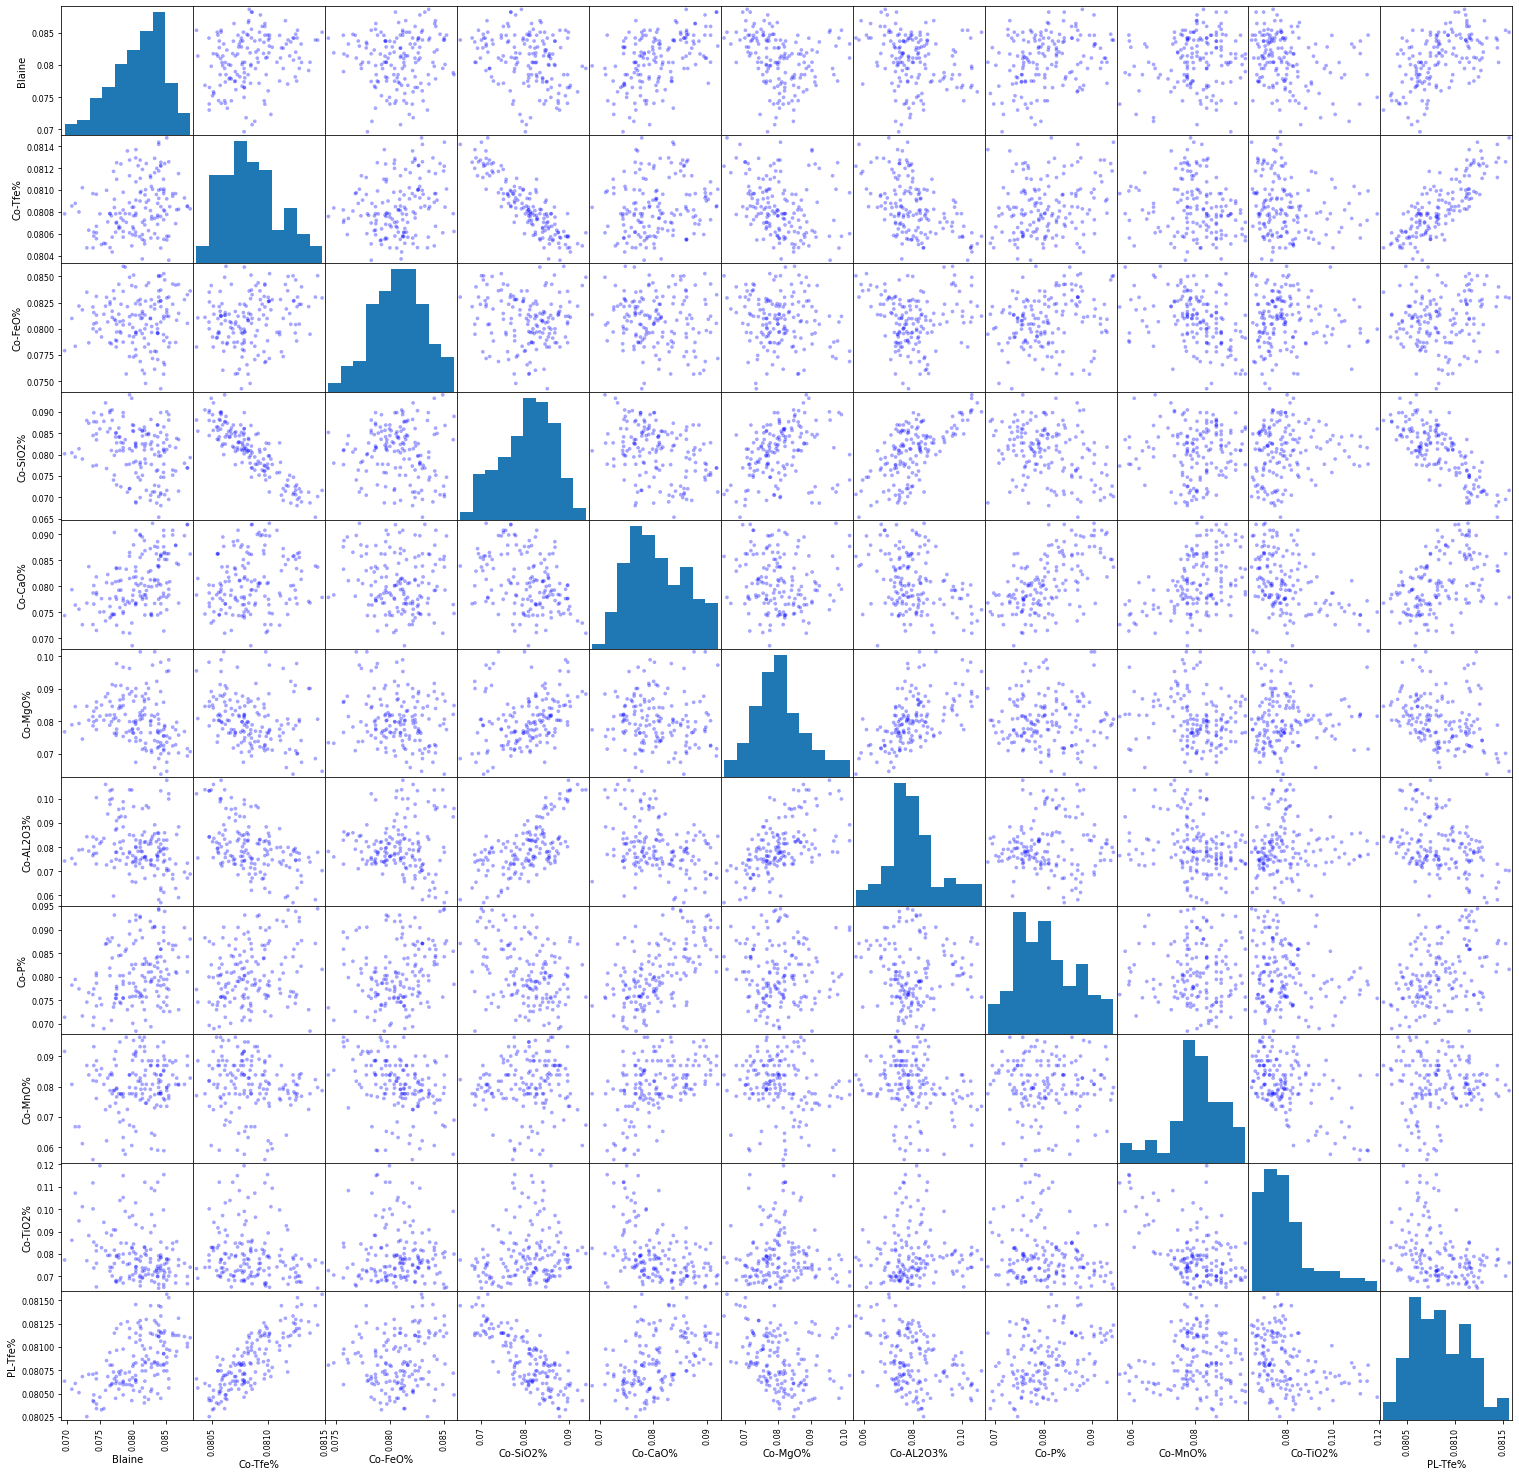

In [24]:
plt.figure(dpi=200)
pd.plotting.scatter_matrix(normal_df, c='blue',alpha=0.35, s=55,figsize=[26,26])
plt.show()

(11, 11)


<AxesSubplot:>

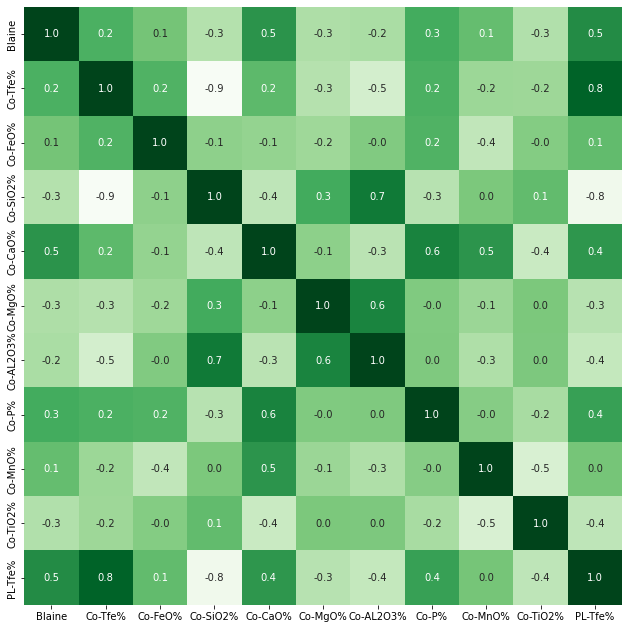

In [25]:
corr = normal_df.corr()
print(corr.shape)
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar=False,square= True, fmt='.1f', annot=True, annot_kws={'size':10}, cmap='Greens')

# جداسازی داده های آموزشی و تست

In [26]:
# split into input and output elements
X, y = data[:, :-1], data[:, -1]

In [27]:
X

array([[0.08169208, 0.08053795, 0.07911805, ..., 0.07301924, 0.09630486,
        0.07252171],
       [0.08231933, 0.08062948, 0.07855177, ..., 0.08096309, 0.08853834,
        0.0729355 ],
       [0.07671887, 0.08076478, 0.07857488, ..., 0.07074574, 0.08449975,
        0.08832186],
       ...,
       [0.07683834, 0.08056979, 0.08167211, ..., 0.08398549, 0.08387843,
        0.0701261 ],
       [0.07647991, 0.08078468, 0.07867889, ..., 0.08184574, 0.08387843,
        0.07938188],
       [0.0775104 , 0.08109906, 0.07969589, ..., 0.07743249, 0.07921852,
        0.07921854]])

In [28]:
y

array([0.08039965, 0.08043649, 0.08059616, 0.08064529, 0.08052247,
       0.08053475, 0.08066986, 0.08059616, 0.0807067 , 0.08064529,
       0.08073127, 0.08073127, 0.08065757, 0.08052247, 0.08069442,
       0.08058388, 0.08060844, 0.08063301, 0.08063301, 0.08046106,
       0.08041193, 0.08048562, 0.08033824, 0.08032595, 0.08025226,
       0.08033824, 0.08046106, 0.08038736, 0.08042421, 0.08051019,
       0.08054703, 0.08060844, 0.08068214, 0.0807067 , 0.08085409,
       0.08065757, 0.08062073, 0.08063301, 0.08060844, 0.08044878,
       0.08054703, 0.0804979 , 0.08062073, 0.08064529, 0.08084181,
       0.08101376, 0.08074355, 0.0807804 , 0.08101376, 0.08080496,
       0.08082953, 0.08081724, 0.08092778, 0.08092778, 0.08094007,
       0.08082953, 0.08082953, 0.08080496, 0.08096463, 0.08080496,
       0.08081724, 0.08082953, 0.08084181, 0.08082953, 0.08090322,
       0.0807067 , 0.08068214, 0.08055932, 0.08079268, 0.08074355,
       0.0807067 , 0.08074355, 0.08089094, 0.08100148, 0.08103

In [29]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# استفاده از مدل رگرسیون خطی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [94]:
# fit the model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

مدل چقدر خوب آموزش دیده است؟

In [95]:
ybar = model.predict(X_train)

In [96]:
# evaluate predictions
mae = mean_absolute_error(y_train, ybar)
print('MAE: %.3f' %mae)

MAE: 0.000


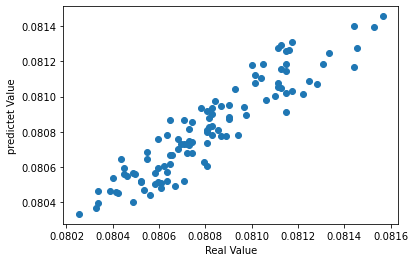

In [97]:
plt.scatter(y_train, ybar)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [98]:
print("The Train Score is ", (r2_score( y_train, ybar)))

The Train Score is  0.8589671175750174


مدل چقدر خوب حدس می زند؟

In [99]:
# evaluate the model
yhat = model.predict(X_test)

In [100]:
# evaluate predictions
mae = mean_absolute_error(y_test, yhat)
print('MAE: %.3f' %mae)

MAE: 0.000


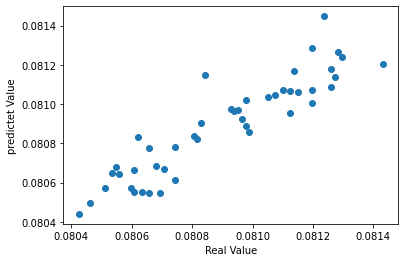

In [101]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [102]:
print("The Predict Score is ", (r2_score( y_test,yhat)))


The Predict Score is  0.8338226572751903


# استفاده از شبکه عصبی برای حل مسئله و حدس زدن جواب نمونه های آزمایشی

In [103]:
model = MLPRegressor(hidden_layer_sizes=(100,),activation="relu" ,random_state=1, max_iter=200000)
model.fit(X_train, y_train)


MLPRegressor(max_iter=200000, random_state=1)

مدل چقدر خوب آموزش دیده است؟

In [104]:
ybar = model.predict(X_train)

In [105]:
# evaluate predictions
mae = mean_absolute_error(y_train, ybar)
print('MAE: %.3f' %mae)

MAE: 0.033


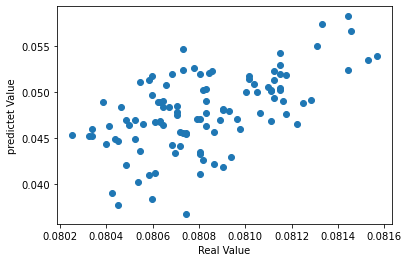

In [106]:
plt.scatter(y_train, ybar)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()

In [107]:
print("The Train Score is ", (r2_score( y_train, ybar)))

The Train Score is  -13023.153398065377


مدل چقدر خوب حدس می زند؟

In [90]:
# evaluate the model
yhat = model.predict(X_test)

In [91]:
print("The Train Score is: ", (r2_score( y_test,yhat)))

The Train Score is:  -17277.786850653996


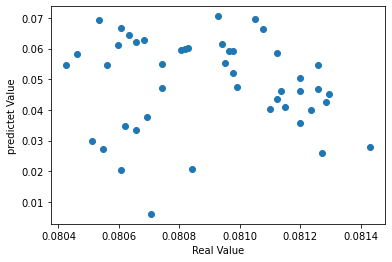

In [92]:
plt.scatter(y_test,yhat)
plt.xlabel('Real Value')
plt.ylabel('predictet Value')
plt.show()